(253680, 22)
   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age 

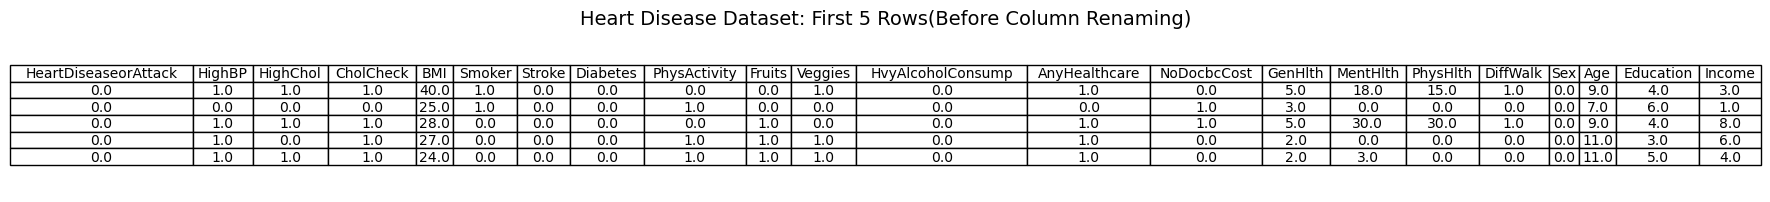

Categorical columns : []
Numerical columns : ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex', 'Age', 'Diet', 'Stress_Level']
        HighBP  HighChol  CholCheck   BMI  Smoking_Status  Stroke  Diabetes  \
0          1.0       1.0        1.0  40.0             1.0     0.0       0.0   
1          0.0       0.0        0.0  25.0             1.0     0.0       0.0   
2          1.0       1.0        1.0  28.0             0.0     0.0       0.0   
3          1.0       0.0        1.0  27.0             0.0     0.0       0.0   
4          1.0       1.0        1.0  24.0             0.0     0.0       0.0   
...        ...       ...        ...   ...             ...     ...       ...   
253675     1.0       1.0        1.0  45.0             0.0     0.0       0.0   
253676     1.0       1.0        1.0  18.0             0.0     0.0       2.0   
253677     0.0       0.0        1.0  28.0    

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


           Classifier   ROC-AUC  Precision    Recall  Accuracy  F1-Score
0  LogisticRegression  0.836151   0.746419  0.790441  0.761345  0.767799
1        RandomForest  0.981322   0.953293  0.919031  0.937105  0.935849
2    GradientBoosting  0.968090   0.909903  0.892986  0.902442  0.901365
3        DecisionTree  0.941919   0.938067  0.897258  0.919143  0.917209
4          NaiveBayes  0.800619   0.701439  0.830653  0.738976  0.760597
5                 KNN  0.949330   0.907446  0.918225  0.912430  0.912804
6            AdaBoost  0.881003   0.779703  0.828560  0.797563  0.803390
7    VotingClassifier  0.973583   0.898110  0.941546  0.917500  0.919315


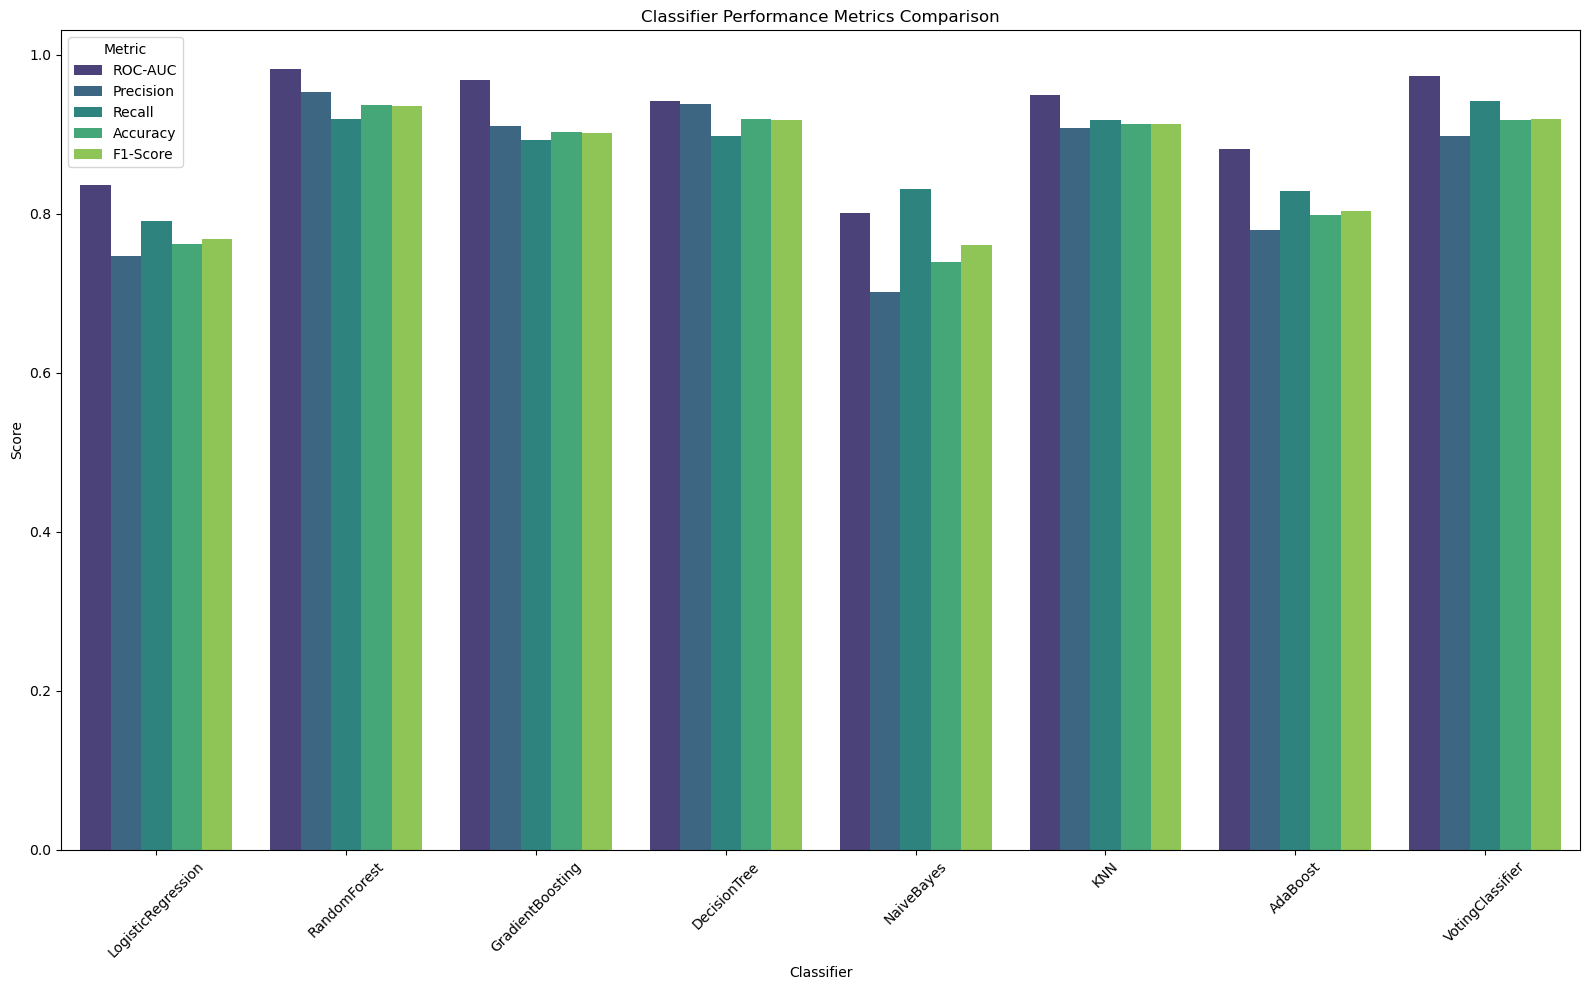

In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
import joblib  # For saving models

# Load the heart disease health indicators dataset
heart_disease_data = pd.read_csv("//Users/nethajivudugula/Downloads/heart_disease_health_indicators_BRFSS2015.csv")

# Display the basic information
print(heart_disease_data.shape)
print(heart_disease_data.head())
print(heart_disease_data.describe())

# Save head of the dataset as a table image
fig, ax = plt.subplots(figsize=(10,2))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=heart_disease_data.head().values, colLabels=heart_disease_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(list(range(len(heart_disease_data.columns))))

plt.title("Heart Disease Dataset: First 5 Rows(Before Column Renaming)", fontsize=14, pad=10)
save_path = "heart_disease_data_head 1.png"
#plt.savefig(save_path, bbox_inches='tight')
plt.show()

# Rename columns based on the provided mapping
heart_disease_data.rename(columns={
    'Fruits': 'diet_fruits',
    'Veggies': 'diet_veggies',
    'Smoker': 'Smoking_Status',
    'Diabetes_012': 'Diabetes'
}, inplace=True)

# Combine 'Fruits' and 'Veggies' into a single 'diet' column
heart_disease_data['Diet'] = heart_disease_data[['diet_fruits', 'diet_veggies']].mean(axis=1)
heart_disease_data.drop(columns=['diet_fruits', 'diet_veggies'], inplace=True)

# Combine 'Stress' columns into a single 'Stress_Level' column
stress_columns = ['MentHlth', 'PhysHlth', 'GenHlth', 'Income', 'NoDocbcCost', 'DiffWalk']
heart_disease_data['Stress_Level'] = heart_disease_data[stress_columns].mean(axis=1)
heart_disease_data.drop(columns=stress_columns, inplace=True)

# Select only the relevant numerical columns
numerical_columns = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 
                     'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex', 
                     'Age', 'Diet', 'Stress_Level']

heart_disease_data = heart_disease_data[numerical_columns]

# Handle missing values by dropping rows with any missing data
heart_disease_data.dropna(inplace=True)

# Check for categorical and numerical columns
cat_col = [col for col in heart_disease_data.columns if heart_disease_data[col].dtype == 'object']
num_col = [col for col in heart_disease_data.columns if heart_disease_data[col].dtype != 'object']
print('Categorical columns :', cat_col)
print('Numerical columns :', num_col)

# Split data into features (X) and target (y)
X = heart_disease_data.drop(columns=['HeartDiseaseorAttack'])
y = heart_disease_data['HeartDiseaseorAttack']

print(X)
print(X.describe)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(C=10, solver='liblinear', random_state=42),
    'RandomForest': RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=4, min_samples_split=2, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan'),
    'AdaBoost': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
    'VotingClassifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression(C=10, solver='liblinear', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_depth=None, random_state=42)),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('dt', DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=42)),
        ('nb', GaussianNB()),
        ('knn', KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')),
        ('ad', AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)),
    ], voting='soft')
}

# Train each classifier and evaluate performance
results = []
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1]
    
    scores = {
        'Classifier': name,
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    results.append(scores)

# Save model as model.pkl
joblib.dump(classifiers, 'model.pkl')

# Display results
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Plot the classifier performance
plt.figure(figsize=(16, 10))
sns.barplot(data=results_df.melt(id_vars='Classifier', value_vars=['ROC-AUC', 'Precision', 'Recall', 'Accuracy', 'F1-Score'], 
                                 var_name='Metric', value_name='Score'), x='Classifier', y='Score', hue='Metric', palette='viridis')
plt.title('Classifier Performance Metrics Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('Classifier_Performance.png', dpi=300)
plt.show()


In [28]:
# Convert the array back to a DataFrame with the original feature names
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [30]:
print("Transformed features:", [list(row) for row in X_scaled])


Transformed features: [['H', 'i', 'g', 'h', 'B', 'P'], ['H', 'i', 'g', 'h', 'C', 'h', 'o', 'l'], ['C', 'h', 'o', 'l', 'C', 'h', 'e', 'c', 'k'], ['B', 'M', 'I'], ['S', 'm', 'o', 'k', 'i', 'n', 'g', '_', 'S', 't', 'a', 't', 'u', 's'], ['S', 't', 'r', 'o', 'k', 'e'], ['D', 'i', 'a', 'b', 'e', 't', 'e', 's'], ['P', 'h', 'y', 's', 'A', 'c', 't', 'i', 'v', 'i', 't', 'y'], ['H', 'v', 'y', 'A', 'l', 'c', 'o', 'h', 'o', 'l', 'C', 'o', 'n', 's', 'u', 'm', 'p'], ['A', 'n', 'y', 'H', 'e', 'a', 'l', 't', 'h', 'c', 'a', 'r', 'e'], ['S', 'e', 'x'], ['A', 'g', 'e'], ['D', 'i', 'e', 't'], ['S', 't', 'r', 'e', 's', 's', '_', 'L', 'e', 'v', 'e', 'l']]


In [31]:
# Ensure X retains feature names
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Debug transformed features
print("After scaling:", X_scaled.values)
print("Transformed features:", X_scaled.to_dict(orient='records')[:5])  # First 5 rows as dicts for readability

# Make predictions
y_pred = model['LogisticRegression'].predict(X_scaled)
print("Predictions:", y_pred)


After scaling: [[ 0.86049959  0.9067307   0.15974222 ...  0.00656879 -0.63762279
   1.43255724]
 [-1.19905274 -1.14369058 -6.54213919 ... -0.68483293 -2.13646437
  -0.88817599]
 [ 0.86049959  0.9067307   0.15974222 ...  0.00656879 -0.63762279
   3.5024004 ]
 ...
 [-1.19905274 -1.14369058  0.15974222 ... -2.41333725 -0.63762279
  -1.01362103]
 [ 0.86049959 -1.14369058  0.15974222 ... -0.68483293  0.86121879
  -0.95089851]
 [ 0.86049959  0.9067307   0.15974222 ...  0.00656879 -0.63762279
  -0.95089851]]
Transformed features: [{'HighBP': 0.8604995934609296, 'HighChol': 0.9067307034357129, 'CholCheck': 0.15974221927519391, 'BMI': 1.6661572591618572, 'Smoking_Status': 0.9635947771858555, 'Stroke': -0.31976324900741293, 'Diabetes': -0.5641657655768283, 'PhysActivity': -1.6043487178990203, 'HvyAlcoholConsump': -0.21557064554170338, 'AnyHealthcare': 0.20751237986227464, 'Sex': -1.0272413124264053, 'Age': 0.006568794076713946, 'Diet': -0.6376227854377965, 'Stress_Level': 1.4325572447248016}, {'

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [24]:
model = joblib.load('model.pkl')
print("Available classifiers in the model:", model.keys())
log_reg = model['LogisticRegression']
print("Number of features expected by LogisticRegression:", log_reg.coef_.shape[1])


Available classifiers in the model: dict_keys(['LogisticRegression', 'RandomForest', 'GradientBoosting', 'DecisionTree', 'NaiveBayes', 'KNN', 'AdaBoost', 'VotingClassifier'])
Number of features expected by LogisticRegression: 14


In [25]:
print("Shape of X:", X.shape)  # Ensure this is (n_samples, 14)
print("First few rows of X:\n", X.head())


Shape of X: (253680, 14)
First few rows of X:
    HighBP  HighChol  CholCheck   BMI  Smoking_Status  Stroke  Diabetes  \
0     1.0       1.0        1.0  40.0             1.0     0.0       0.0   
1     0.0       0.0        0.0  25.0             1.0     0.0       0.0   
2     1.0       1.0        1.0  28.0             0.0     0.0       0.0   
3     1.0       0.0        1.0  27.0             0.0     0.0       0.0   
4     1.0       1.0        1.0  24.0             0.0     0.0       0.0   

   PhysActivity  HvyAlcoholConsump  AnyHealthcare  Sex   Age  Diet  \
0           0.0                0.0            1.0  0.0   9.0   0.5   
1           1.0                0.0            0.0  0.0   7.0   0.0   
2           0.0                0.0            1.0  0.0   9.0   0.5   
3           1.0                0.0            1.0  0.0  11.0   1.0   
4           1.0                0.0            1.0  0.0  11.0   1.0   

   Stress_Level  
0      7.000000  
1      0.833333  
2     12.500000  
3      1.333333

In [26]:
# Re-train the model
model = {
    'LogisticRegression': LogisticRegression(C=10, solver='liblinear', random_state=42),
    # Add other classifiers if needed
}

for name, clf in model.items():
    clf.fit(X_train_scaled, y_train)

# Save the re-trained model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [20]:
print("Features fitted in StandardScaler:", scaler.feature_names_in_)


Features fitted in StandardScaler: ['HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoking_Status' 'Stroke'
 'Diabetes' 'PhysActivity' 'HvyAlcoholConsump' 'AnyHealthcare' 'Sex' 'Age'
 'Diet' 'Stress_Level']


In [27]:
model = joblib.load('model.pkl')
log_reg = model['LogisticRegression']

# Ensure proper scaling and prediction
X_scaled = scaler.transform(X)  # Ensure X is aligned and scaled
y_pred = log_reg.predict(X_scaled)
print("Predictions:", y_pred[:10])


Predictions: [1. 0. 1. 0. 1. 1. 0. 1. 1. 0.]


In [21]:
model = joblib.load('model.pkl')
log_reg = model['LogisticRegression']

# Number of features the Logistic Regression model expects
print("Number of features expected by LogisticRegression:", log_reg.coef_.shape[1])


Number of features expected by LogisticRegression: 14


In [22]:
training_features = list(X_train.columns)
prediction_features = list(X.columns)

# Check for mismatched features
missing_features = set(training_features) - set(prediction_features)
extra_features = set(prediction_features) - set(training_features)

print("Missing features in prediction:", missing_features)
print("Extra features in prediction:", extra_features)


Missing features in prediction: set()
Extra features in prediction: set()


In [23]:
# Refit the scaler on the aligned feature set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_scaled = scaler.transform(X)


In [15]:
model = joblib.load('model.pkl')
print("Features expected by the model:", model['LogisticRegression'].feature_names_in_)


AttributeError: 'LogisticRegression' object has no attribute 'feature_names_in_'

In [16]:
print("Number of features expected:", model['LogisticRegression'].coef_.shape[1])


Number of features expected: 14


In [17]:
feature_names = X_train.columns  # Before scaling
model_data = {'model': classifiers, 'features': feature_names}
joblib.dump(model_data, 'model_with_features.pkl')


['model_with_features.pkl']

In [18]:
model_data = joblib.load('model_with_features.pkl')
classifiers = model_data['model']
feature_names = model_data['features']
print("Features expected by the model:", feature_names)


Features expected by the model: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')


In [19]:
print("Training feature set:", X_train.columns)
print("Prediction feature set:", X.columns)


Training feature set: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')
Prediction feature set: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')


In [7]:
print("Features used during training:", X_train.columns)


Features used during training: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')


In [8]:
print("Features fitted in StandardScaler:", scaler.feature_names_in_)


Features fitted in StandardScaler: ['HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoking_Status' 'Stroke'
 'Diabetes' 'PhysActivity' 'HvyAlcoholConsump' 'AnyHealthcare' 'Sex' 'Age'
 'Diet' 'Stress_Level']


In [9]:
print("Features passed for prediction:", X.columns if isinstance(X, pd.DataFrame) else "Not a DataFrame")


Features passed for prediction: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')


In [10]:
training_features = set(scaler.feature_names_in_)
prediction_features = set(X.columns)
missing_features = training_features - prediction_features
extra_features = prediction_features - training_features

print("Missing features:", missing_features)
print("Extra features:", extra_features)


Missing features: set()
Extra features: set()


In [11]:
print("Training features:", X_train.columns)
print("Shape of X_train:", X_train.shape)


Training features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')
Shape of X_train: (367659, 14)


In [12]:
print("Prediction features:", X.columns if isinstance(X, pd.DataFrame) else "Not a DataFrame")
print("Shape of X:", X.shape)


Prediction features: Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status', 'Stroke',
       'Diabetes', 'PhysActivity', 'HvyAlcoholConsump', 'AnyHealthcare', 'Sex',
       'Age', 'Diet', 'Stress_Level'],
      dtype='object')
Shape of X: (253680, 14)


In [13]:
print("Features fitted to StandardScaler:", scaler.feature_names_in_)


Features fitted to StandardScaler: ['HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoking_Status' 'Stroke'
 'Diabetes' 'PhysActivity' 'HvyAlcoholConsump' 'AnyHealthcare' 'Sex' 'Age'
 'Diet' 'Stress_Level']


In [2]:
import numpy as np
import joblib

# Load the trained scaler and model
scaler = joblib.load('scaler.pkl')  # Ensure the scaler is saved during training
model = joblib.load('model.pkl')

# Example raw input data
raw_features = [23.0, 1.0, 1.0, 23.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  # 14 features in your example

# Verify the expected input shape
expected_features = [
    'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoking_Status',
    'Stroke', 'Diabetes', 'PhysActivity', 'HvyAlcoholConsump',
    'AnyHealthcare', 'Sex', 'Age', 'Diet', 'Stress_Level'
]

if len(raw_features) != len(expected_features):
    raise ValueError(f"Input feature count {len(raw_features)} does not match expected count {len(expected_features)}.")

# Transform the input features
input_data = np.array(raw_features).reshape(1, -1)  # Reshape for scaler
input_data_scaled = scaler.transform(input_data)

# Make a prediction
try:
    prediction = model['LogisticRegression'].predict(input_data_scaled)  # Ensure the classifier exists in the saved model dict
    prediction_proba = model['LogisticRegression'].predict_proba(input_data_scaled)
    print("Prediction:", prediction)
    print("Prediction Probability:", prediction_proba)
except Exception as e:
    print("Error during prediction:", str(e))


Prediction: [1.]
Prediction Probability: [[4.9552582e-08 9.9999995e-01]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())


Class distribution before SMOTE: HeartDiseaseorAttack
0.0    229787
1.0     23893
Name: count, dtype: int64
Class distribution after SMOTE: HeartDiseaseorAttack
0.0    229787
1.0    229787
Name: count, dtype: int64


In [4]:
# Evaluate on original data
y_pred_original = model['LogisticRegression'].predict(scaler.transform(X_test))
print(classification_report(y_test, y_pred_original))


              precision    recall  f1-score   support

         0.0       0.78      0.73      0.75     46033
         1.0       0.75      0.79      0.77     45882

    accuracy                           0.76     91915
   macro avg       0.76      0.76      0.76     91915
weighted avg       0.76      0.76      0.76     91915



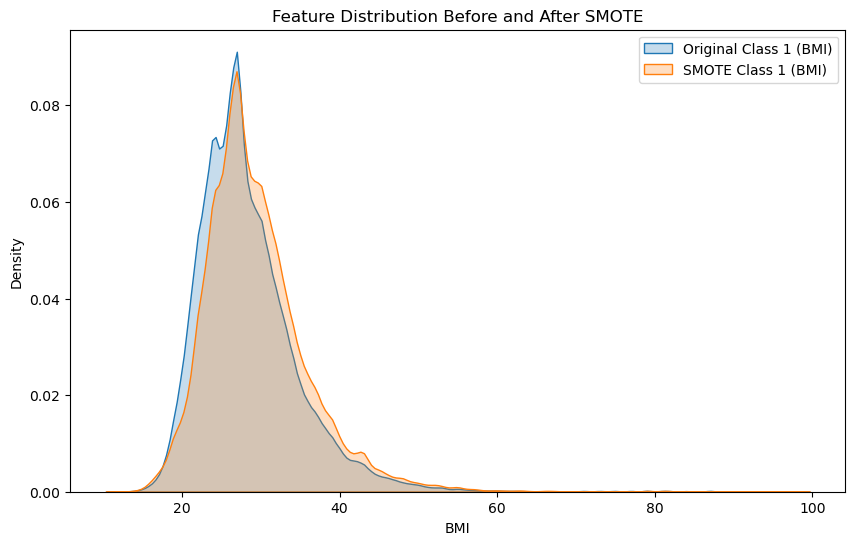

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.kdeplot(X['BMI'], label='Original Class 1 (BMI)', fill=True)
sns.kdeplot(X_resampled[y_resampled == 1]['BMI'], label='SMOTE Class 1 (BMI)', fill=True)
plt.title('Feature Distribution Before and After SMOTE')
plt.legend()
plt.show()
